In [85]:
import pandas as pd

# アジア語の文字幅をきれいに表示するおまじない
pd.set_option('display.unicode.east_asian_width', True) 

In [103]:
df = pd.read_csv('mydata1.csv',skipinitialspace=True)


`skip-initial-space`はアジア語で余計な空白が入るのを防ぐので，いつもつけておくとよい．

In [104]:
type(df)

pandas.core.frame.DataFrame

`df`は`DataFrame`というクラスに割当てられています．

```{.py}
class DataFrame():
    def __str__(self):
```

のように`__str__`メソッドがあるので，文字列にすることができ，

In [105]:
df.__str__()

'                                       # mydata1.csv\n名前 性別 好きな数 誕生月 セロリ好き度          身長\n薗田 男   7        5      とても嫌い             172\n鈴木 女   3        12     好き                   165\n斎藤 男   4        10     嫌い                   180'

文字列を表示すれば

In [106]:
print(df.__str__())

                                       # mydata1.csv
名前 性別 好きな数 誕生月 セロリ好き度          身長
薗田 男   7        5      とても嫌い             172
鈴木 女   3        12     好き                   165
斎藤 男   4        10     嫌い                   180


のように表示されます．jupyterだともっときれいに出力できて

In [107]:
df

,,,,,# mydata1.csv
名前,性別,好きな数,誕生月,セロリ好き度,身長
薗田,男,7,5,とても嫌い,172
鈴木,女,3,12,好き,165
斎藤,男,4,10,嫌い,180


```{.py}
class DataFrame():
    def __init__(self, ...):
        self.shape = ...
```

のようなクラス変数`shape`があり，データフレームの行数（観測数）と列数（変数数）をタプルで表示します．

In [108]:
print(df.shape)

(4, 1)


4つの観測，1つの変数となりました．

あれれ，それは違います．今回のデータは3観測(薗田と鈴木と斎藤)，6変数（名前,..., 身長）のはずなので`(3,6)`であるはずです．

ファイルを直接見ると，1行目に`# mydata1.csv`とあり，これはメモですね．読み飛ばす行番号をリストにして`skiprows`オプションに渡します．


In [109]:
df = pd.read_csv('mydata1.csv',skipinitialspace=True, skiprows=[0])
df

,名前,性別,好きな数,誕生月,セロリ好き度,身長
0,薗田,男,7,5,とても嫌い,172
1,鈴木,女,3,12,好き,165
2,斎藤,男,4,10,嫌い,180


In [110]:
print(df.shape)

(3, 6)


きちんと，3観測6変数になりました．ちなみに読み飛ばした後の最初の行をヘッダ(header)，変数名リストとして読みます．
クラス変数columnsに変数名が保存されています．

ちなみに，ヘッダ行は観測ではないので，(4,6)ではなく(3,6)になっています．

In [111]:
print(df.columns)

Index(['名前', '性別', '好きな数', '誕生月', 'セロリ好き度', '身長'], dtype='object')


変数名が並んだ行が無いCSVもあります．例えば`mydata2.csv`は`mydata1.csv`と同じ3観測6変数のデータですが，

In [112]:
df = pd.read_csv('mydata2.csv',skipinitialspace=True)
df

,薗田,男,7,5,とても嫌い,172
0,鈴木,女,3,12,好き,165
1,斎藤,男,4,10,嫌い,180


In [113]:
df.shape

(2, 6)

のように，データの1観測目がヘッダと捉えられてしまいます．よって，
`header`が無いことを教えて read_csv　します．

In [114]:
df = pd.read_csv('mydata2.csv',skipinitialspace=True,header=None)
df

,0,1,2,3,4,5
0,薗田,男,7,5,とても嫌い,172
1,鈴木,女,3,12,好き,165
2,斎藤,男,4,10,嫌い,180


ただし，ヘッダが無いので変数名が仮に0,....,5となっています．


In [115]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


きちんと変数名を決めるには
このクラス変数`columns`を正しいもので上書きします．

In [120]:
df.columns=['Name','Sex','FavoriteNumber','BirthMonth','CeleryFavor','Height']
df

,Name,Sex,FavoriteNumber,BirthMonth,CeleryFavor,Height
0,薗田,男,7,5,とても嫌い,172
1,鈴木,女,3,12,好き,165
2,斎藤,男,4,10,嫌い,180


変数名を変えるにはrenameメソッドを使ってもよいです．

In [121]:
df.rename(columns={'Sex':'Gender'})

,Name,Gender,FavoriteNumber,BirthMonth,CeleryFavor,Height
0,薗田,男,7,5,とても嫌い,172
1,鈴木,女,3,12,好き,165
2,斎藤,男,4,10,嫌い,180


ところで，データフレームを表示したときに，左端に毎回0から始まる数字が書かれています．
これは，CSVにおける観測の個体IDであり，「インデックス(index)」と読んでいます．データ本体には含まれません．

In [122]:
print(df.index)

RangeIndex(start=0, stop=3, step=1)


indexは0から始まって，1ずつ増えて，3の前までということみたいですね．

### データを集めたら

そんなこんなで，`mydata1.csv`を読みます．

In [196]:
df = pd.read_csv('mydata1.csv',skipinitialspace=True,header=1)
df

,名前,性別,好きな数,誕生月,セロリ好き度,身長
0,薗田,男,7,5,とても嫌い,172
1,鈴木,女,3,12,好き,165
2,斎藤,男,4,10,嫌い,180



#### データフレーム上の値は以下のように参照できます．

- 変数「好きな数」だけを全サンプル参照してみます．

In [140]:
col1 = df[['好きな数']]
col1

,好きな数
0,7
1,3
2,4


In [144]:
print(type(col1), col1.shape)

<class 'pandas.core.frame.DataFrame'> (3, 1)


In [139]:
col2 = df.好きな数
col2

0    7
1    3
2    4
Name: 好きな数, dtype: int64

In [143]:
print(type(col2), col2.shape)

<class 'pandas.core.series.Series'> (3,)


In [146]:
col3 = df['好きな数']
col3

0    7
1    3
2    4
Name: 好きな数, dtype: int64

In [147]:
print(type(col3),col3.shape)

<class 'pandas.core.series.Series'> (3,)


In [150]:
col4 = df[['好きな数']][:2] #　スライスで行番号
col4

,好きな数
0,7
1,3


In [151]:
print(type(col4),col4.shape)

<class 'pandas.core.frame.DataFrame'> (2, 1)


In [160]:
col5 = df.loc[:1, '好きな数'] # 行スライスが`:1`に注意
col5

0    7
1    3
Name: 好きな数, dtype: int64

In [161]:
print(type(col5), col5.shape)

<class 'pandas.core.series.Series'> (2,)


In [162]:
col6 = df.iloc[:2, 2] # 変数の順番で指定
col6

0    7
1    3
Name: 好きな数, dtype: int64

以上から，
- `df[['var']]` : DataFrame 2階テンソル（行列）
- `df['var']` : Series 1階テンソル（ベクトル）
- `df.var` : Series 1階テンソル（ベクトル）

- `df[['var']][:2]` : DataFrame
- `df.loc[:1, 'var']` : Series
- `df.iloc[:2, 2]` : Series 


### データの要約

データの要約は describeメソッドで行います．

In [197]:
df.describe(include='all')

,名前,性別,好きな数,誕生月,セロリ好き度,身長
count,3,3,3.000000,3.000000,3,3.000000
unique,3,2,NaN,NaN,3,NaN
top,薗田,男,NaN,NaN,とても嫌い,NaN
freq,1,2,NaN,NaN,1,NaN
mean,NaN,NaN,4.666667,9.000000,NaN,172.333333
std,NaN,NaN,2.081666,3.605551,NaN,7.505553
min,NaN,NaN,3.000000,5.000000,NaN,165.000000
25%,NaN,NaN,3.500000,7.500000,NaN,168.500000
50%,NaN,NaN,4.000000,10.000000,NaN,172.000000
75%,NaN,NaN,5.500000,11.000000,NaN,176.000000


全て，各項目ごとの代表値で，

- `count`はデータの個数(sample size，サンプルサイズ)
- `unique`は*データに現れた*水準の個数 (**本当の水準数ではない**)
- `top`はデータの最頻値，`freq`は最頻値の頻度
- `mean`は平均値，`std`は標準偏差(STandard Deviation)
- `min`は最小値，`max`は最大値，
- `25%`, `50%`, `75%`は四分位で，ヒストグラムを低い水準から並べたときに下位25％，50％，75％にあたる水準を答えるものです．下位50％はmedian（メディアン，メジアン）とも呼ばれます．
- `NaN` は *Not a Number* 値なし

この関数の中身は，以下のDataFrameのメソッドを使っても表示されます．

In [174]:
df.count()

名前            3
性別            3
好きな数        3
誕生月          3
セロリ好き度    3
身長            3
dtype: int64

In [166]:
df.mean()

/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_51225/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


好きな数      4.666667
誕生月        9.000000
身長        172.333333
dtype: float64

In [167]:
df.median()

/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_51225/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


好きな数      4.0
誕生月       10.0
身長        172.0
dtype: float64

In [169]:
df.std()

/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_51225/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


好きな数    2.081666
誕生月      3.605551
身長        7.505553
dtype: float64

In [171]:
df.quantile(q=0.25)

好きな数      3.5
誕生月        7.5
身長        168.5
Name: 0.25, dtype: float64

In [172]:
df.quantile(q=0.5)

好きな数      4.0
誕生月       10.0
身長        172.0
Name: 0.5, dtype: float64

In [173]:
df.quantile(q=0.75)

好きな数      5.5
誕生月       11.0
身長        176.0
Name: 0.75, dtype: float64

ところで，身長は平均や標準偏差に意味がありますが，「好きな数」や「誕生月」にとっての平均や標準偏差は意味不明ですね．

「好きな数」や「誕生月」って，いわば「性別」と同じように，どれが最初でどれが最後だとか無いですね．

ということで，各変数は，尺度（スケール，scale）というものがあります．

|尺度名|特徴|計算可能|
|---|---|---|
|名義尺度(nominal)|分類のための単なる文字・数字| `==`, `!=`, `is`, `not`|
|順序尺度(ordered)|順序関係のある文字・数字| `>`, `<`|
|間隔尺度(interval)|MKS単位系でない測定値| `+`,`-`|
|比尺度(ratio)| MKS単位系の測定値 | `*`,`/`|

間隔尺度と比尺度は見分けにくいが，MKS単位系（メートル，キログラム，秒）を基本単位とする測定値は原器に対する比で表されるので比尺度，それ以外の単位系（または単位無し）の測定値は間隔尺度と考えられる．

では，`mydata1.csv`の各変数の尺度は何でしょうか.

また，各変数は，とりうる値のリスト（「水準」といいます）がすでに決められています．各変数の具体的な水準はどうなっているでしょうか

|変数名|尺度|水準|
|---|---|---|
|名前|名義尺度|あらゆる人名|
|性別|名義尺度|集合{'男','女'}|
|好きな数|名義尺度|集合{'1','2','3','4','5','6','7','8','9','10','11','12'}|
|誕生月|名義尺度|集合{'1','2','3','4','5','6','7','8','9','10','11','12'}|
|セロリ好き度|順序尺度|リスト['とても嫌い'，'嫌い'，'普通'，'好き'，'とても好き']|
|身長|比尺度|あらゆる実数|



Pandasでは，それぞれの尺度に型（クラス）を割り当てています．
- 名義尺度は，`Categorical(categories=[...],ordered=False)`クラス
- 順序尺度は，`Categorical(categories=[...],ordered=True)`クラス
- 間隔尺度と比尺度は，`Float`クラス

というわけで，そのように直します．

[公式サイトの`class pandas.Categorical`](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html)

- 「名前」

In [198]:
df['名前']

0    薗田
1    鈴木
2    斎藤
Name: 名前, dtype: object

In [187]:
df['名前'] = pd.Categorical(df['名前'])
df['名前']

0    薗田
1    鈴木
2    斎藤
Name: 名前, dtype: category
Categories (3, object): ['斎藤', '薗田', '鈴木']

- 「性別」

In [199]:
df['性別']

0    男
1    女
2    男
Name: 性別, dtype: object

In [200]:
GenderSet = {'男','女'}
df['性別'] = pd.Categorical(df['性別'], categories=GenderSet, ordered=False)
df['性別']

0    男
1    女
2    男
Name: 性別, dtype: category
Categories (2, object): ['男', '女']

- 「好きな数」，「誕生月」

In [201]:
df['好きな数']

0    7
1    3
2    4
Name: 好きな数, dtype: int64

In [203]:
df['好きな数'] = df['好きな数'].astype('str') 
# MonthSet = {'1','2','3','4','5','6','7','8','9','10','11','12'} でもいいですが
MonthSet = set([str(n) for n in range(1,13)])
df['好きな数'] = pd.Categorical(df['好きな数'], categories=MonthSet, ordered=False)

df['好きな数']

0    7
1    3
2    4
Name: 好きな数, dtype: category
Categories (12, object): ['4', '6', '7', '3', ..., '9', '5', '10', '8']

In [204]:
df['誕生月'] = df['誕生月'].astype('str') 
df['誕生月'] = pd.Categorical(df['誕生月'], categories=MonthSet, ordered=False)

- 「セロリ好き度」

In [205]:
df['セロリ好き度']

0    とても嫌い
1          好き
2          嫌い
Name: セロリ好き度, dtype: object

In [206]:
CerelyFavorLevel = ['とても嫌い','嫌い','ふつう','好き','とても好き']
df['セロリ好き度'] = pd.Categorical(df['セロリ好き度'],categories=CerelyFavorLevel,ordered=True)
df['セロリ好き度']

0    とても嫌い
1          好き
2          嫌い
Name: セロリ好き度, dtype: category
Categories (5, object): ['とても嫌い' < '嫌い' < 'ふつう' < '好き' < 'とても好き']

要約

In [208]:
df.describe(include='all')

,名前,性別,好きな数,誕生月,セロリ好き度,身長
count,3,3,3,3,3,3.000000
unique,3,2,3,3,3,NaN
top,薗田,男,4,12,とても嫌い,NaN
freq,1,2,1,1,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,172.333333
std,NaN,NaN,NaN,NaN,NaN,7.505553
min,NaN,NaN,NaN,NaN,NaN,165.000000
25%,NaN,NaN,NaN,NaN,NaN,168.500000
50%,NaN,NaN,NaN,NaN,NaN,172.000000
75%,NaN,NaN,NaN,NaN,NaN,176.000000


### pandasとmatplotlibによるデータ図示

Pandasは，Matplotlibというグラフ表示ライブラリを中で呼び出して，データをグラフ表示できます．

あらかじめ，matplotlibをインストールしておいてください．

```{.sh}
poetry add matplotlib
```

importをこちらで行わなくても，pandasの関数が勝手に呼び出します．

ただし，日本語を表示できないので, japanize-matplotlibをインストールして，こちらをimportしてください．

```{.sh}
poetry add japanize-matplotlib
```


In [220]:
import japanize_matplotlib # importは　japanize_matplotlib (japanize-matplotlibではない)

<AxesSubplot:>

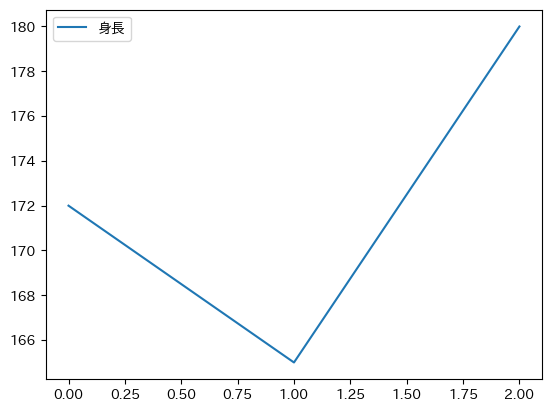

In [222]:
# 折れ線グラフ
df.plot()

<AxesSubplot:>

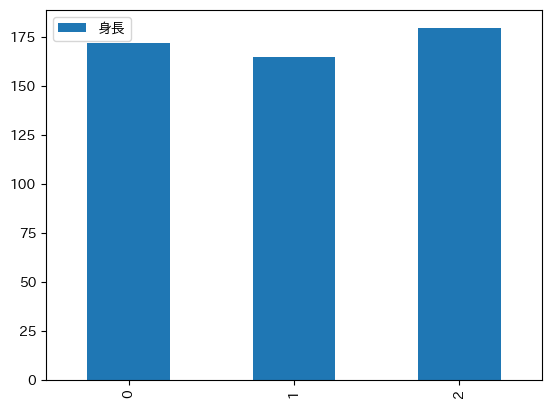

In [229]:
# 棒グラフ
df.plot.bar()

<AxesSubplot:ylabel='Frequency'>

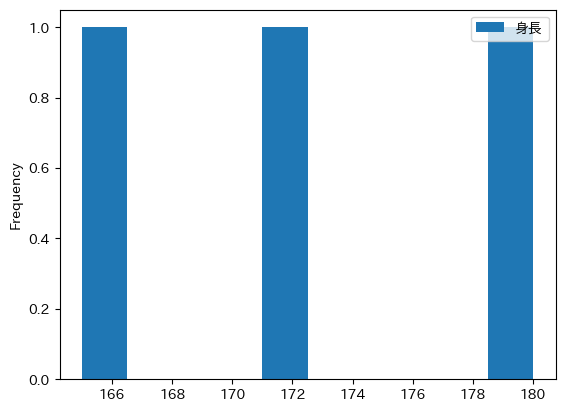

In [230]:
# ヒストグラム
df.plot.hist(bins=10)

<AxesSubplot:>

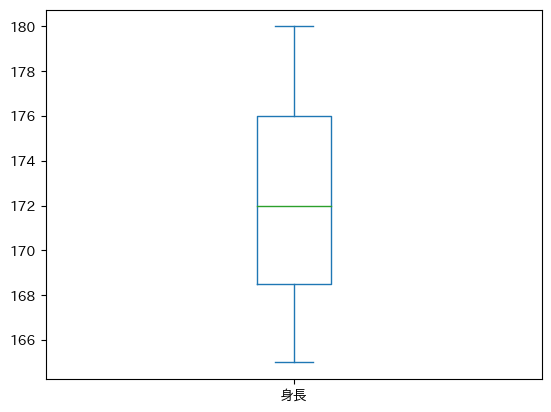

In [231]:
# 箱ひげ図
df.plot.box()

## 課題k02

